# **Importing Libraries**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Loading Dataset**

In [125]:
df=pd.read_csv("/content/reddit_artist_posts_sentiment.csv")

In [126]:
df.head()

,text,label
0,pitchfork track review: taylor swift’s “actual...,negative
1,taylor swift has regained the masters of her f...,positive
2,pitchfork review: taylor swift - the life of a...,neutral
3,taylor swift announced engagement,neutral
4,taylor swift - the fate of ophelia (official m...,neutral


In [127]:
df.isnull().sum()

,0
text,0
label,0


In [128]:
df['label'].value_counts()

,count
label,
neutral,19728
positive,8825
negative,3395


In [129]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [130]:
df['label']=encoder.fit_transform(df['label'])

In [131]:
df.head()

,text,label
0,pitchfork track review: taylor swift’s “actual...,0
1,taylor swift has regained the masters of her f...,2
2,pitchfork review: taylor swift - the life of a...,1
3,taylor swift announced engagement,1
4,taylor swift - the fate of ophelia (official m...,1


#**Cleaning the Data**

In [132]:
# Check for duplicate valus
df.duplicated().sum()

np.int64(1106)

In [133]:
# Removing Duplicates
df=df.drop_duplicates(keep='first')

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df.shape

(30842, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

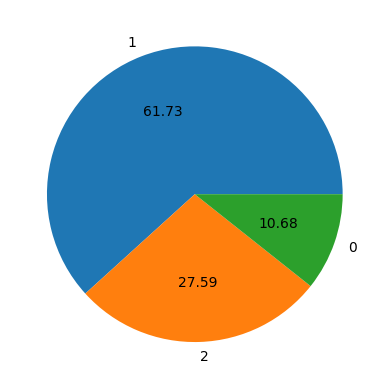

In [136]:
plt.pie(df['label'].value_counts(),labels=[1,2,0],autopct='%0.2f')
plt.show

#**Features**

In [137]:
import nltk

In [138]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [139]:
df['num_characters'] = df['text'].apply(len)

In [140]:
df.head()

,text,label,num_characters
0,pitchfork track review: taylor swift’s “actual...,0,83
1,taylor swift has regained the masters of her f...,2,62
2,pitchfork review: taylor swift - the life of a...,1,61
3,taylor swift announced engagement,1,33
4,taylor swift - the fate of ophelia (official m...,1,57


In [141]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[pitchfork, track, review, :, taylor, swift, ’..."
1,"[taylor, swift, has, regained, the, masters, o..."
2,"[pitchfork, review, :, taylor, swift, -, the, ..."
3,"[taylor, swift, announced, engagement]"
4,"[taylor, swift, -, the, fate, of, ophelia, (, ..."
...,...
31943,"[why, do, we, feel, like, pop, music, is, gett..."
31944,"[in, korea, do, they, call, kpop, just, regula..."
31945,"[are, there, less, hours, of, sunlight, in, am..."
31946,"[if, there, is, only, one, woman, for, every, ..."


In [142]:
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [143]:
df.head()


,text,label,num_characters,num_words
0,pitchfork track review: taylor swift’s “actual...,0,83,15
1,taylor swift has regained the masters of her f...,2,62,12
2,pitchfork review: taylor swift - the life of a...,1,61,14
3,taylor swift announced engagement,1,33,4
4,taylor swift - the fate of ophelia (official m...,1,57,12


In [144]:
df["num_sent"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)) )

In [145]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,30842.000000,30842.000000,30842.000000
mean,96.906005,20.178588,1.460768
std,61.403954,13.414412,0.880769
min,1.000000,1.000000,1.000000
25%,53.000000,11.000000,1.000000
50%,79.000000,16.000000,1.000000
75%,122.000000,25.000000,2.000000
max,280.000000,80.000000,13.000000


In [146]:
#1=neutral
df[df['label']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,3293.000000,3293.000000,3293.000000
mean,117.207713,24.385667,1.627391
std,66.111788,15.031156,1.044835
min,1.000000,1.000000,1.000000
25%,68.000000,13.000000,1.000000
50%,98.000000,20.000000,1.000000
75%,158.000000,33.000000,2.000000
max,280.000000,78.000000,10.000000


In [147]:
#2=positive
df[df['label']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,19039.000000,19039.000000,19039.000000
mean,86.386260,17.768265,1.318767
std,55.788177,11.997928,0.731978
min,1.000000,1.000000,1.000000
25%,49.000000,10.000000,1.000000
50%,71.000000,14.000000,1.000000
75%,104.000000,21.000000,1.000000
max,280.000000,80.000000,13.000000


In [148]:
#0=negative
df[df['label']==2][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,8510.000000,8510.000000,8510.000000
mean,112.585429,23.943126,1.713984
std,66.019450,14.446852,1.034704
min,1.000000,1.000000,1.000000
25%,64.000000,13.000000,1.000000
50%,96.000000,20.000000,1.000000
75%,152.000000,32.000000,2.000000
max,280.000000,76.000000,8.000000


In [149]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

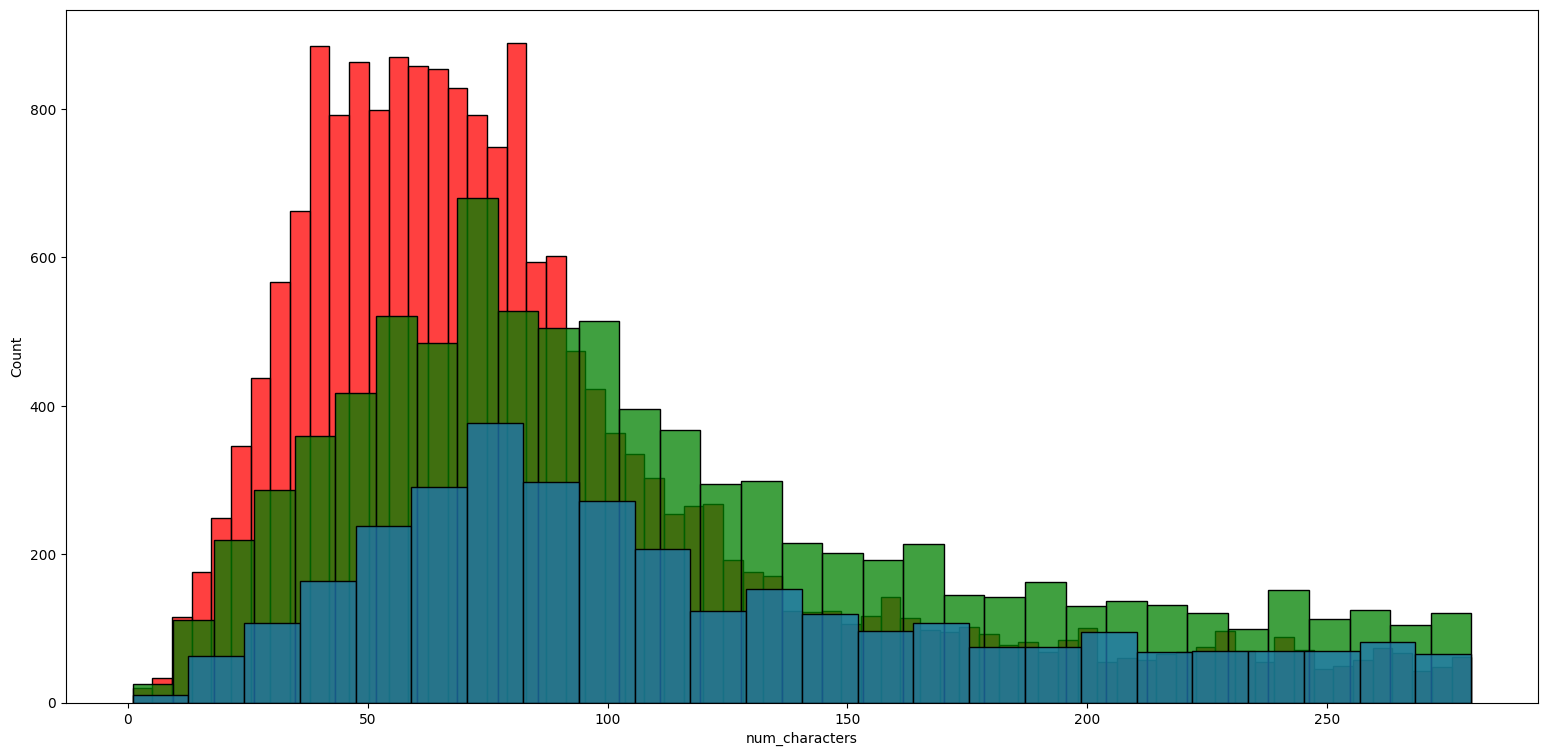

In [150]:
plt.figure(figsize=(19,9))
sns.histplot(df[df['label']==1]['num_characters'],color='red')
sns.histplot(df[df['label']==2]['num_characters'],color='green')
sns.histplot(df[df['label']==0]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

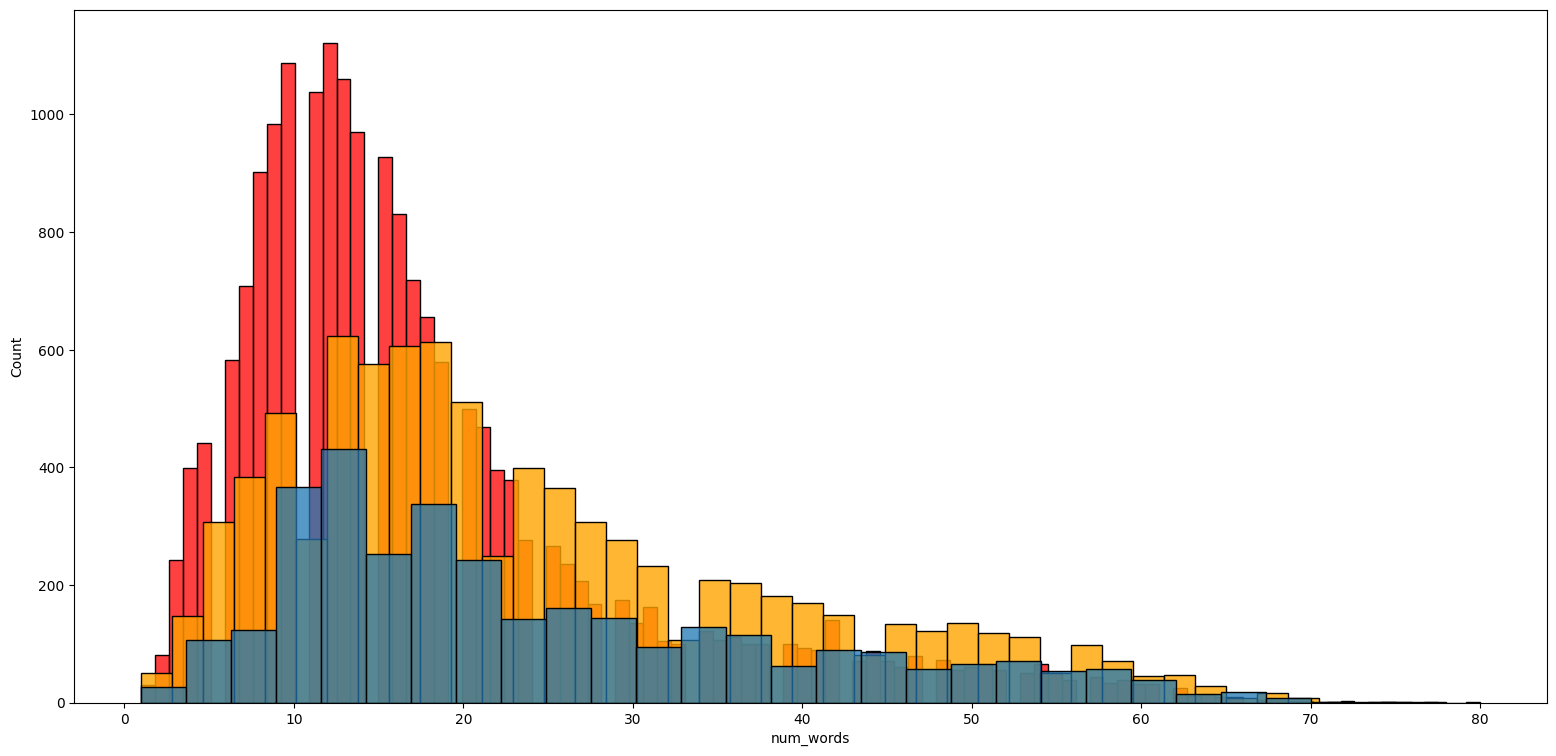

In [151]:
plt.figure(figsize=(19,9))
sns.histplot(df[df['label']==1]['num_words'],color='red')
sns.histplot(df[df['label']==2]['num_words'],color='orange',alpha=0.8)
sns.histplot(df[df['label']==0]['num_words'])

#**Balancing the data**

**negative=0,neutral=1,positive=2**

In [152]:
neutral=df[df['label']==1]

In [153]:
positive=df[df['label']==2]

In [154]:
negative=df[df['label']==0]

In [155]:
print("Neutral shape",neutral.shape)

Neutral shape (19039, 5)


In [156]:
print("Positive shape",positive.shape)

Positive shape (8510, 5)


In [157]:
print("Negative shape",negative.shape)

Negative shape (3293, 5)


In [158]:
neutral=neutral.sample(negative.shape[0])

In [159]:
neutral.shape

(3293, 5)

In [160]:
positive=positive.sample(negative.shape[0])

In [161]:
positive.shape

(3293, 5)

In [162]:
#Checking the shape of the data
neutral.shape,positive.shape,negative.shape

((3293, 5), (3293, 5), (3293, 5))

In [163]:
#append all three labels
data=pd.concat([neutral,positive,negative],ignore_index=True)

In [164]:
data.sample(10)

,text,label,num_characters,num_words,num_sent
4546,after weeks of issues with my local printing s...,2,115,25,2
9319,caroline polachek and oneohtrix point never on...,0,90,17,1
1219,"brantley gilbert announces ""let it ride tour 2...",1,82,16,1
1538,is there a connection between jojo siwa and ar...,1,58,11,1
2974,kbs immortal songs concert relocated to pruden...,1,57,8,1
2841,sour mystery hoodie does anybody know what the...,1,84,17,1
2053,man pulled billie eilish into the crowd during...,1,64,12,1
7924,im scared right now!! with black friday rsd im...,0,248,59,5
6899,"with his taylor swift pregnancy tweet, elon mu...",0,76,15,1
1451,billie eilish - hit me hard and soft (3rd albu...,1,62,16,1


In [165]:
data.columns

Index(['text', 'label', 'num_characters', 'num_words', 'num_sent'], dtype='object')

#**Transforming the text**

In [166]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [167]:
from nltk.corpus import stopwords

In [168]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [169]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [170]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [171]:
data['text'].apply(transform_text)

,text
0,sour vote day 2
1,taylor swift fan convinc spot singer superstit...
2,megathread grammi 2017 red carpet
3,sabrina carpent espresso 2024
4,anyon go honeymoon tour see
...,...
9874,lock go becom huge barrier futur pop music aff...
9875,actual rock song refer pop song music journali...
9876,peopl mean refer pop music hate everyon meet
9877,pop music fuck terribl ca put finger but annoy...


In [172]:
data['transformed_text']=data['text'].apply(transform_text)

In [173]:
data.head()

,text,label,num_characters,num_words,num_sent,transformed_text
0,sour voting day 2,1,17,4,1,sour vote day 2
1,taylor swift fans are convinced they’ve spotte...,1,121,25,1,taylor swift fan convinc spot singer superstit...
2,[megathread] grammys 2017: red carpet and pre-...,1,50,10,1,megathread grammi 2017 red carpet
3,sabrina carpenter - espresso [chill/lounge] (2...,1,50,10,1,sabrina carpent espresso 2024
4,did anyone go to the honeymoon tour? if so whe...,1,65,16,2,anyon go honeymoon tour see


#Representing the data through WordCloud

In [174]:
from wordcloud import WordCloud

In [175]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [176]:
negative_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=""))

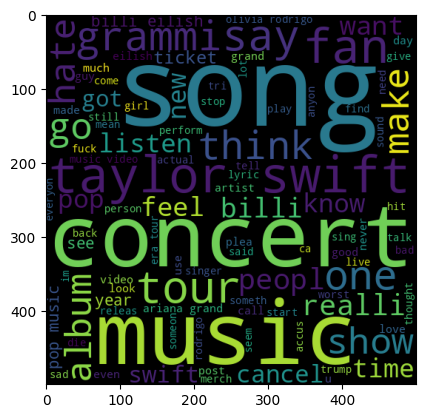

In [177]:
plt.imshow(negative_wc)

In [178]:
neutral_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=""))

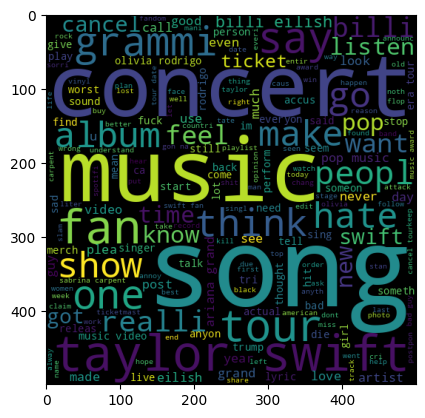

In [179]:
plt.imshow(neutral_wc)

In [180]:
positive_wc=wc.generate(data[data['label']==2]['transformed_text'].str.cat(sep=""))

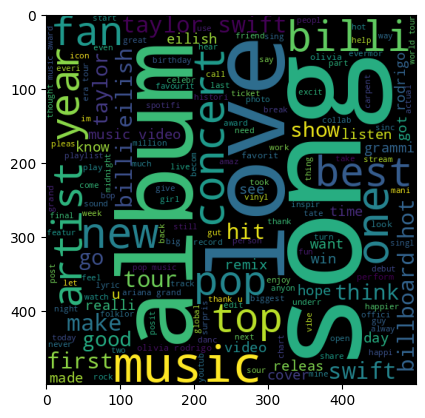

In [181]:
plt.imshow(positive_wc)

#**Visualisation on Balanced Data**

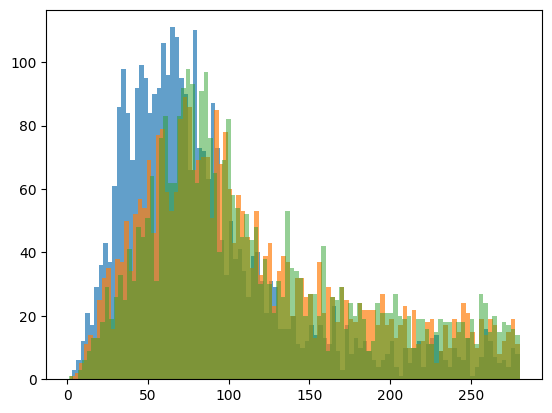

In [182]:
plt.hist(data[data['label']==1]['num_characters'],bins=100,alpha=0.7)
plt.hist(data[data['label']==2]['num_characters'],bins=100,alpha=0.7)
plt.hist(data[data['label']==0]['num_characters'],bins=100,alpha=0.5)
plt.show()

#**Spliting Data**

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(data['transformed_text'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [185]:
x_train

,transformed_text
5304,viviz bop bop mv perform ver
7636,shellback return produc 1989 taylor version ex...
5412,show love albatross feel like underr lol love ...
6535,fashion highlight sabrina carpent everi color ...
1247,noah cyru send internet meltdown outfit ladi g...
...,...
9225,sure tour end abruptli never got bunch gear re...
4859,kneecap bap rais gaza food parcel run 10k day ...
3264,feed cleans instead worri tate collab right dr...
9845,make fun pop music like earli 2010 anymor


In [186]:
y_train

,label
5304,2
7636,0
5412,2
6535,2
1247,1
...,...
9225,0
4859,2
3264,1
9845,0


# **Building Model Pipeline Tf-idf (Random Forest)**



In [187]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [188]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [189]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

#**Predicting the results (Random Forest)**

In [190]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [191]:
rf_pred=rf_classifier.predict(x_test)

In [192]:
#Confusion Matrix
confusion_matrix(y_test,rf_pred)

array([[702, 200, 112],
       [182, 626, 173],
       [142, 229, 598]])

In [193]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.6497975708502024

In [194]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1014
           1       0.59      0.64      0.61       981
           2       0.68      0.62      0.65       969

    accuracy                           0.65      2964
   macro avg       0.65      0.65      0.65      2964
weighted avg       0.65      0.65      0.65      2964



In [195]:
# Predict a real message
rf_classifier.predict(["i like songs and taylor is average"])

array([0])

# Applying SVM model

In [196]:
from sklearn.svm import SVC

In [197]:
sv_model=SVC(gamma="auto")

In [198]:
sv_classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier', SVC(C=100,gamma='auto'))])

In [199]:
sv_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

#**Predicting models**

In [200]:
sv_pred=sv_classifier.predict(x_test)

In [201]:
#Confusion Matrix
confusion_matrix(y_test,sv_pred)

array([[192,  91, 731],
       [ 37, 198, 746],
       [ 11,  21, 937]])

In [202]:
#Accuracy Score
accuracy_score(y_test,sv_pred)

0.44770580296896084

In [203]:
#Classification Report
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.80      0.19      0.31      1014
           1       0.64      0.20      0.31       981
           2       0.39      0.97      0.55       969

    accuracy                           0.45      2964
   macro avg       0.61      0.45      0.39      2964
weighted avg       0.61      0.45      0.39      2964



# **Applying Decision tree**

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dt_model=DecisionTreeClassifier()

In [206]:
dt_classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier', DecisionTreeClassifier())])

In [207]:
dt_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

#**Predicting Models**

In [208]:
dt_pred=dt_classifier.predict(x_test)

In [209]:
#Confusion Matrix
confusion_matrix(y_test,dt_pred)

array([[630, 212, 172],
       [216, 558, 207],
       [175, 242, 552]])

In [210]:
#Accuracy Score
accuracy_score(y_test,dt_pred)

0.5870445344129555

#**Applying Naive Bayes**

In [211]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()

In [212]:
nv_classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier', MultinomialNB())])

In [213]:
nv_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

#Predicting Results|

In [214]:
nv_pred=nv_classifier.predict(x_test)

In [215]:
#Confusion Matrix
confusion_matrix(y_test,nv_pred)

array([[760,  99, 155],
       [176, 487, 318],
       [ 95, 113, 761]])

In [216]:
#Accuracy Score
accuracy_score(y_test,nv_pred)

0.6774628879892037

In [251]:
rf_classifier.predict(["love u so much"])

array([2])

In [252]:
print("Compairing Accuracy Score")
print("Random Forest",accuracy_score(y_test,rf_pred))
print("Decision tree",accuracy_score(y_test,dt_pred))
print("SVM",accuracy_score(y_test,sv_pred))
print("Naive Bayes",accuracy_score(y_test,nv_pred))

Compairing Accuracy Score
Random Forest 0.6497975708502024
Decision tree 0.5870445344129555
SVM 0.44770580296896084
Naive Bayes 0.6774628879892037


In [253]:
def predict_sentiment(text):
    prediction = rf_classifier.predict([text])
    return prediction[0]

In [258]:
text_to_predict = input("minimum 10 words sentences:")
if text_to_predict.strip() == "":
    print("Please provide text in the input variable")
else:
    prediction_result = predict_sentiment(text_to_predict)
    print(f"The prediction for the provided text is: {prediction_result}")
    if prediction_result == 0:
        print("negative sentiments")
    elif prediction_result == 1:
        print("neutral sentiment")
    else:
      print("Positive sentiment")


minimum 10 words sentences:taylor swift is the best i love her so muvh 
The prediction for the provided text is: 2
Positive sentiment


Conclusion-

1.   By applying model i.e Random Forest,Decision tree,SVM,Naive Bayes
2.   It is observed that Random Forest gives the better accuracy score compare to other models.
3. Hence,accuracy score is 67%
4. It descibes the sentiments on the reviews of Taylor swift concerts.


